In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [2]:
df = pd.read_csv("C:/Users/saiki/OneDrive/Desktop/Allu Saikiran/Projects/diamonds.csv")

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.shape

(53940, 10)

In [5]:
df=df.drop_duplicates()
df.shape

(53794, 10)

In [6]:
df.reset_index(drop=True,inplace=True)

In [7]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [8]:
df.info(),df.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53794 entries, 0 to 53793
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


(None,
 float64    6
 object     3
 int64      1
 dtype: int64)

In [9]:
df.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
print('cut counts\n',df['cut'].value_counts(),'\ncolor counts\n',df['color'].value_counts(),'\nclarity counts\n',df['clarity'].value_counts())

cut counts
 Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: cut, dtype: int64 
color counts
 G    11262
E     9776
F     9520
H     8272
D     6755
I     5407
J     2802
Name: color, dtype: int64 
clarity counts
 SI1     13032
VS2     12229
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: clarity, dtype: int64


# Data Cleaning

In [11]:
df[(df['x']==0)|(df['y']==0)|(df['z']==0)].index

Int64Index([ 2201,  2308,  4778,  5457, 10145, 11156, 11935, 13570, 15914,
            24338, 24464, 26063, 26183, 27047, 27364, 27438, 27672, 49413,
            51361],
           dtype='int64')

In [12]:
df.loc[df["x"] == 0, "x"] = np.nan 
df.loc[df["y"] == 0, "y"] = np.nan 
df.loc[df["z"] == 0, "z"] = np.nan 
df[["x", "y", "z"]].isnull().sum()

x     7
y     6
z    19
dtype: int64

In [13]:
#dropping rows having all nan in x,y,z columns
df = df.dropna(subset=['x', 'y','z'], how='all')

In [14]:
df[df["z"].isna()][['x','z']]

,x,z
2201,6.55,NaN
2308,6.66,NaN
4778,6.50,NaN
5457,6.50,NaN
10145,7.15,NaN
11156,NaN,NaN
13570,6.88,NaN
24338,8.49,NaN
26063,8.52,NaN
27047,8.42,NaN


In [15]:
df = df.dropna(subset=['x','z'], how='all')

In [16]:
df.reset_index(drop=True,inplace=True)

In [17]:
df[df["z"].isna()]

,carat,cut,color,clarity,depth,table,price,x,y,z
2201,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,NaN
2308,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,NaN
4778,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,NaN
5457,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,NaN
10145,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,NaN
13568,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,NaN
24335,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,NaN
26059,2.25,Premium,I,SI1,61.3,58.0,15397,8.52,8.42,NaN
27042,2.20,Premium,H,SI1,61.2,59.0,17265,8.42,8.37,NaN
27432,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53787 entries, 0 to 53786
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53787 non-null  float64
 1   cut      53787 non-null  object 
 2   color    53787 non-null  object 
 3   clarity  53787 non-null  object 
 4   depth    53787 non-null  float64
 5   table    53787 non-null  float64
 6   price    53787 non-null  int64  
 7   x        53787 non-null  float64
 8   y        53787 non-null  float64
 9   z        53775 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53787.0,0.797718,0.473360,0.20,0.40,0.70,1.04,5.01
depth,53787.0,61.748054,1.429824,43.00,61.00,61.80,62.50,79.00
table,53787.0,57.458001,2.233257,43.00,56.00,57.00,59.00,95.00
price,53787.0,3932.366167,3987.377762,326.00,951.00,2401.00,5325.00,18823.00
x,53787.0,5.731960,1.118859,3.73,4.71,5.70,6.54,10.74
y,53787.0,5.735277,1.139669,3.68,4.72,5.71,6.54,58.90
z,53775.0,3.539964,0.702017,1.07,2.91,3.53,4.03,31.80


In [20]:
# as corresponding x values for which z are nan are approx to 85th percentile
df["z"]=df["z"].fillna(df["z"].quantile(0.85))

In [637]:
# If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
# If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. 
# If the skewness is less than -1 or greater than 1, the data are highly skewed.

In [21]:
numerical_feats = df.dtypes[df.dtypes != 'object'].index
categorical_feats = df.dtypes[df.dtypes == 'object'].index
print("SKEW:")
print(df[numerical_feats].skew())

SKEW:
carat    1.113764
depth   -0.113860
table    0.791656
price    1.618367
x        0.397038
y        2.468583
z        1.588481
dtype: float64


insights:
x,depth are fairly symmetric.
table is moderately skewed. 
carat,price,y,z are highly skewed

In [639]:
# The kurtosis of a normal distribution is 0. 
# If a dataset has a positive kurtosis, it has more in the tails than the normal distribution. 
# If a dataset has a negative kurtosis, it has less in the tails than the normal distribution. 

In [640]:
print("KURTOSIS:")
print(df[numerical_feats].kurt()) 

KURTOSIS:
carat     1.247580
depth     5.414469
table     2.773986
price     2.179320
x        -0.703828
y        92.201173
z        48.021669
dtype: float64


insights:
depth is nearly normally distributed
carat,table, x,y,z are platykurtic
price is leptokurtic

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


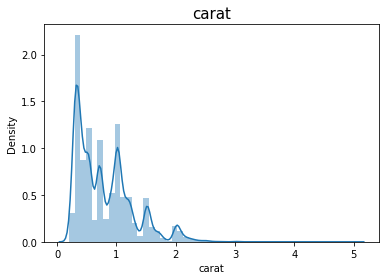

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


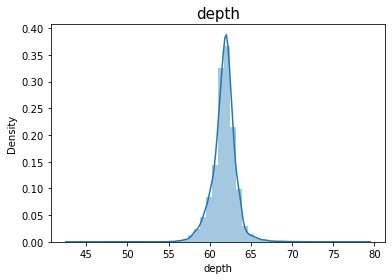

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


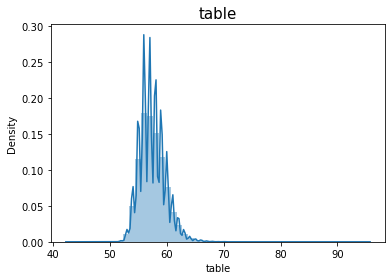

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


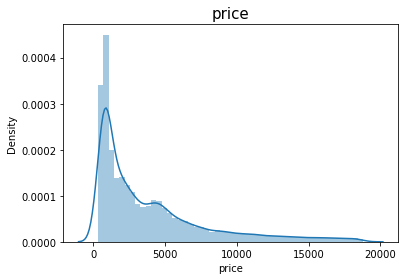

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


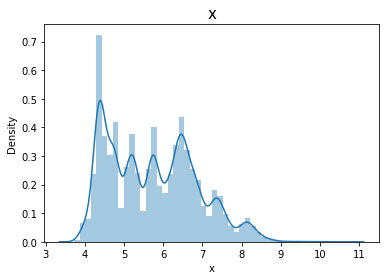

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


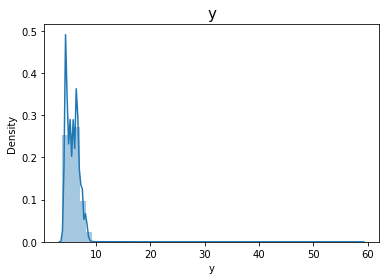

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


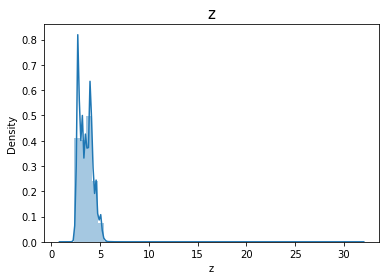

In [641]:
# df.select_dtypes(include=['int64','float64']) return column names of 'int64','float64' data types from df
#probability distribution shapes
for i in df.select_dtypes(include=['int64','float64']):
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

----- SKEWNESS ------------
price skewness = 1.62
carat skewness = 1.11
x skewness = 0.4
y skewness = 2.47
z skewness = 1.59


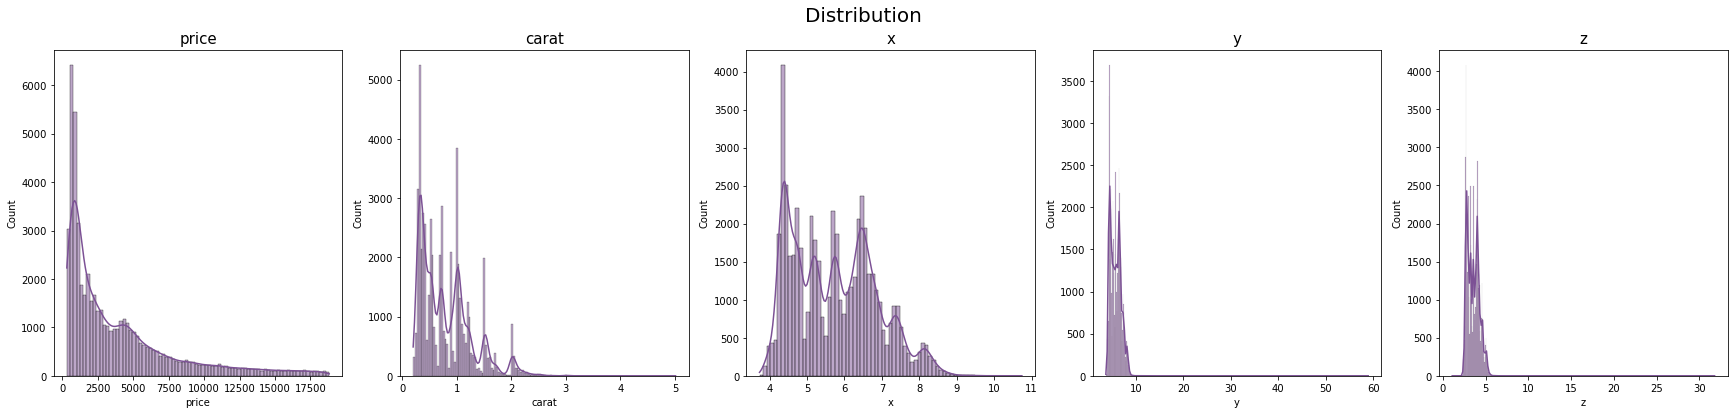

In [642]:
print('----- SKEWNESS ------------')
fig, axes = plt.subplots(1, 5, figsize=[30,6])
axes.flatten()
fig.suptitle('Distribution', fontsize=20)
plt.rcParams['axes.titlesize'] = 15
j = 0
variables = ['price', 'carat', 'x', 'y', 'z']

for col in variables:
    sns.histplot(data=df, x=col, kde=True, ax=axes[j], color='#7C5195')
    axes[j].set_title(col)

    j+=1
    print('{} skewness = {}'.format(col, round(df[col].skew(), 2)))


In [643]:
# Checking for Potential Outliers

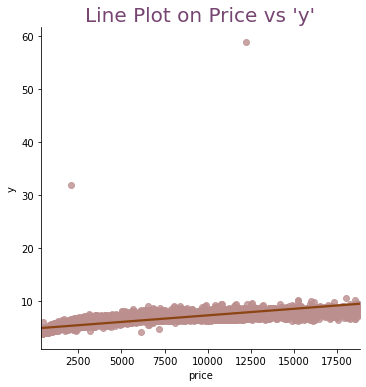

In [644]:
lm = sns.lmplot(x="price", y="y", data=df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'y'", color="#774571", fontsize = 20)
plt.show()

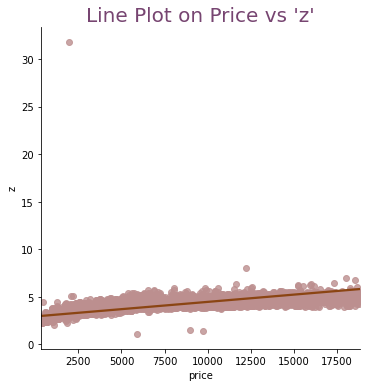

In [645]:
lm = sns.lmplot(x="price", y="z", data=df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'z'", color="#774571", fontsize = 20)
plt.show()

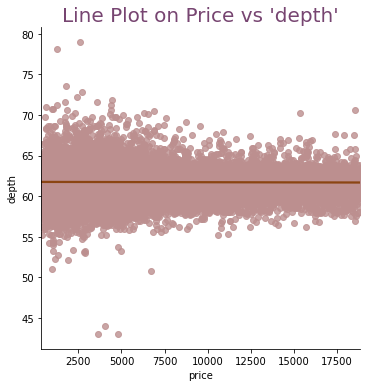

In [646]:
lm = sns.lmplot(x="price", y="depth", data=df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'depth'", color="#774571", fontsize = 20)
plt.show()

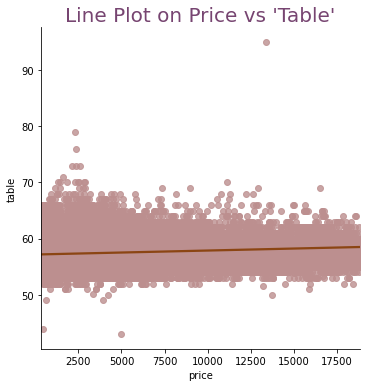

In [647]:
lm = sns.lmplot(x="price", y="table", data=df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'Table'", color="#774571", fontsize = 20)
plt.show()

In [648]:
df['volume']=df['x']*df['y']*df['z']

In [649]:
df_num=df.select_dtypes(include=['int64','float64'])

<AxesSubplot:>

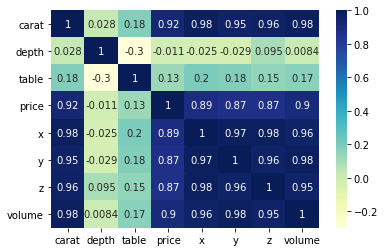

In [650]:
sns.heatmap(df_num.corr(), cmap="YlGnBu", annot=True)

Insight:
As expected, high correlation between the sizes of the diamonds and their price.
Lower correlation between table and price.
Almost no correlation between depth and price. We might want to remove this feature to build the ML models.
Correllation between numeric features and price are positve. Meaning that the higher the size of the diamond, the more costly it is, which actually makes sense.
There's a perfect correlation between carat and our volume feature. Obviously there's also a strong correlation between our volume feature and dimensions. We will drop all those features for modeling, since highly correlated features tend to decrease model performance.

<AxesSubplot:xlabel='volume', ylabel='price'>

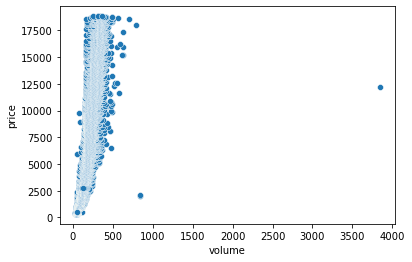

In [651]:
sns.scatterplot(x=df['volume'],y=df['price'])

<AxesSubplot:xlabel='volume', ylabel='price'>

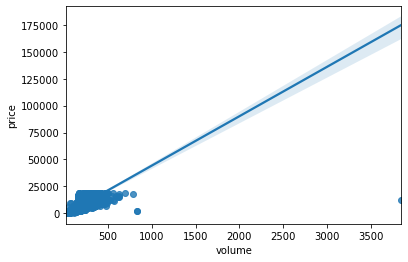

In [652]:
sns.regplot(x=df['volume'],y=df['price'])

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


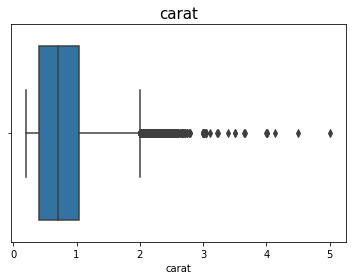

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


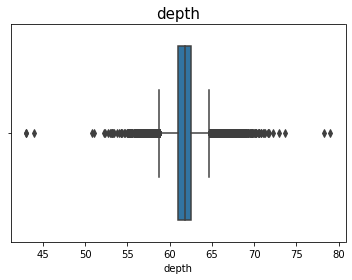

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


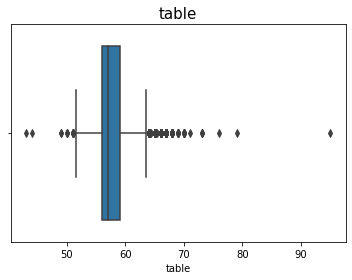

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


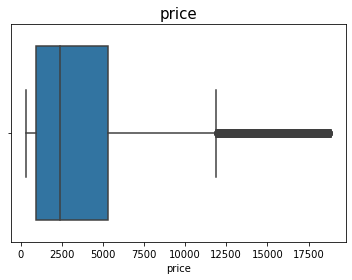

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


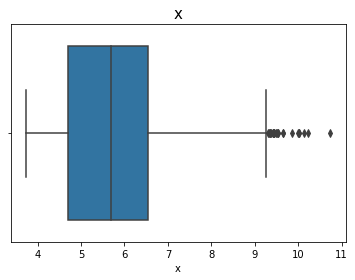

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


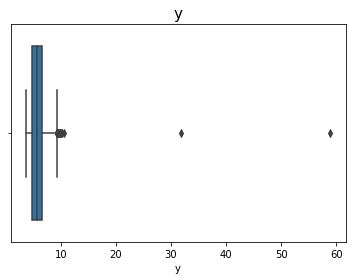

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


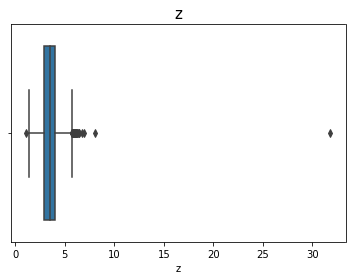

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


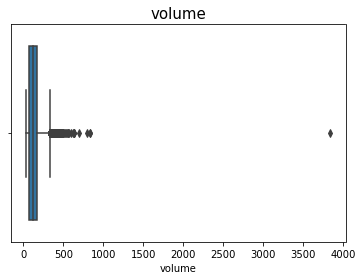

In [653]:
#checking for outliers in numerical columns
for i in df.select_dtypes(include=['int64','float64']):
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [713]:
#To detect all outliers
df1=df.copy()
df1=df.select_dtypes(include=['int64','float64'])
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(df1)
pred = clf.predict(df1)
df1['anomaly']=pred
outliers=df1.loc[df1['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(df1['anomaly'].value_counts())

 1    47332
-1     6455
Name: anomaly, dtype: int64


<ipython-input-713-0bcfcf272275>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['anomaly']=pred


In [ ]:
# There are 6455 potential outliers in data

In [654]:
df_num=df_num.drop('price',axis=1)

In [655]:
# Clipping Numerical columns to roundoff extreme outliers to given quantiles such that no skew>1 os observed.
for i in df_num.columns:
    lower_limit = df[i].quantile(0.02)
    upper_limit = df[i].quantile(0.95)
    df[i] = np.where(df[i] <lower_limit, lower_limit,df[i])
    df[i] = np.where(df[i] >upper_limit, upper_limit,df[i])
    if np.abs(df[i].skew()) > 1:
        print(i,":",df[i].skew())

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


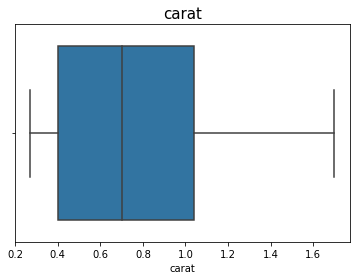

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


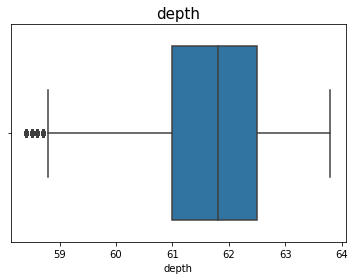

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


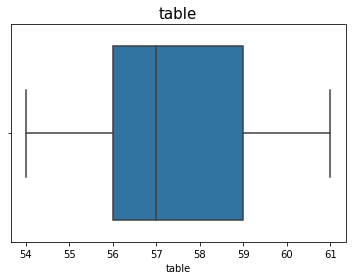

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


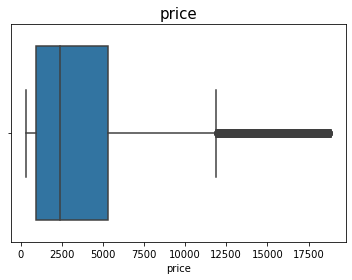

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


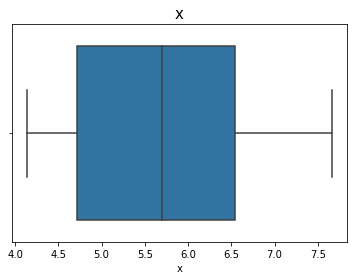

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


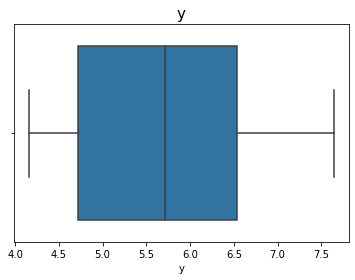

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


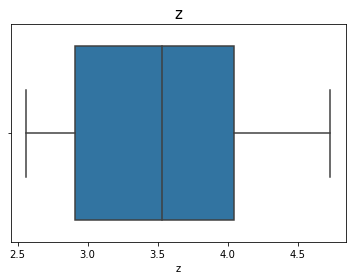

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


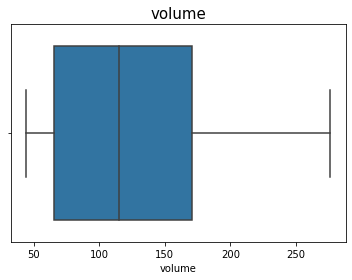

In [656]:
for i in df.select_dtypes(include=['int64','float64']):
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

# Exploratory Data Analysis

In [657]:
# Independent varaiables x,y,z are highly correlated to each other. Hence we can drop y and z columns

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


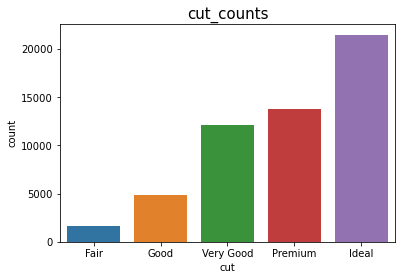

In [658]:
sns.countplot(df['cut'],order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
plt.title('cut_counts')
plt.show()

<AxesSubplot:xlabel='cut', ylabel='price'>

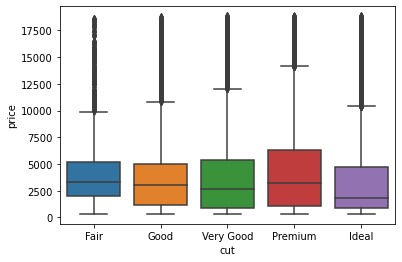

In [659]:
sns.boxplot(x=df['cut'],y=df['price'],order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


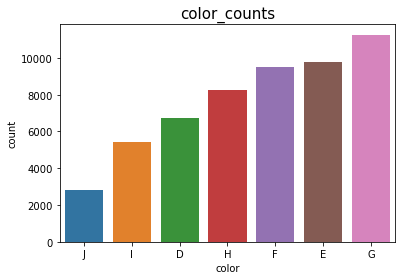

In [660]:
sns.countplot(df['color'],order = ['J', 'I', 'D','H', 'F', 'E', 'G'])
plt.title('color_counts')
plt.show()

<AxesSubplot:xlabel='color', ylabel='price'>

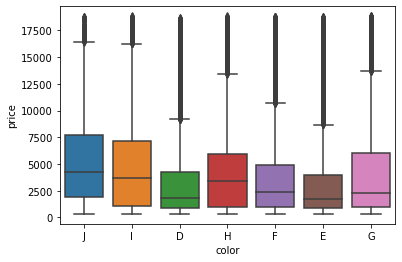

In [661]:
sns.boxplot(x=df['color'],y=df['price'],order=['J', 'I', 'D','H', 'F', 'E', 'G'])

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


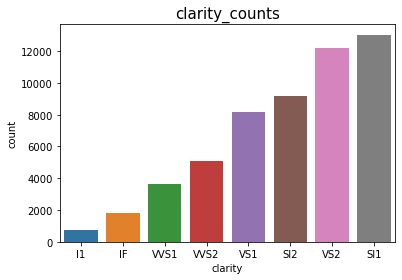

In [662]:
sns.countplot(df['clarity'],order = ['I1', 'IF','VVS1','VVS2','VS1','SI2','VS2', 'SI1'])
plt.title('clarity_counts')
plt.show()

<AxesSubplot:xlabel='clarity', ylabel='price'>

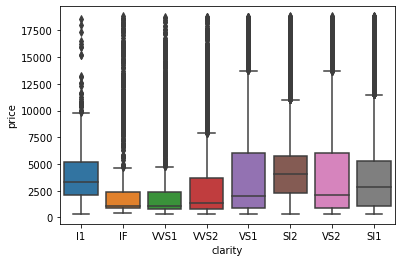

In [663]:
sns.boxplot(x=df['clarity'],y=df['price'],order=['I1', 'IF','VVS1','VVS2','VS1','SI2','VS2', 'SI1'])

In [664]:
# Evaluating categorical features

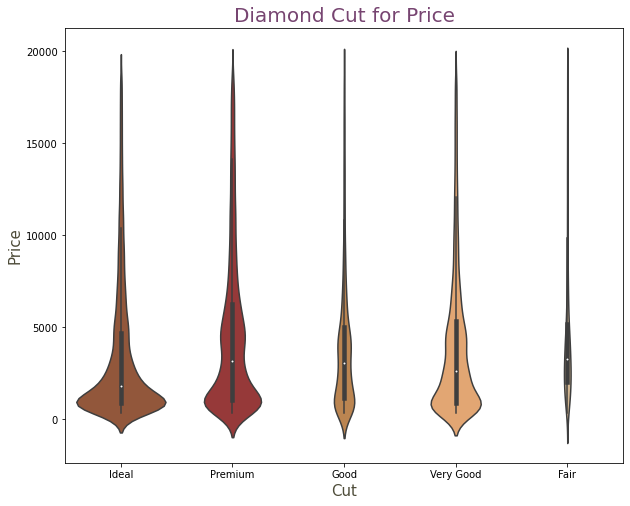

In [665]:
plt.figure(figsize=(10,8))
cols = ["#A0522D","#A52A2A","#CD853F","#F4A460","#DEB887"]
ax = sns.violinplot(x="cut",y="price", data=df, palette=cols,scale= "count")
ax.set_title("Diamond Cut for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Cut", color="#4e4c39", fontsize = 15)
plt.show()

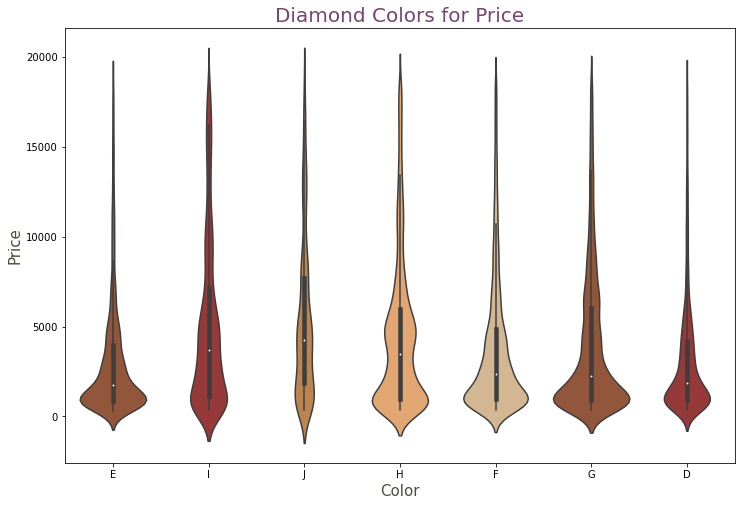

In [666]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="color",y="price", data=df, palette=cols,scale= "count")
ax.set_title("Diamond Colors for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Color", color="#4e4c39", fontsize = 15)
plt.show()

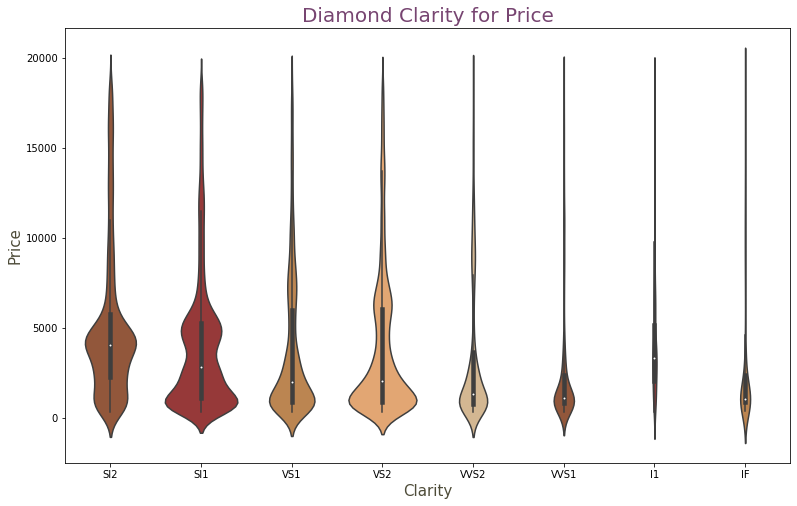

In [667]:
plt.figure(figsize=(13,8))
ax = sns.violinplot(x="clarity",y="price", data=df, palette=cols,scale= "count")
ax.set_title("Diamond Clarity for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Clarity", color="#4e4c39", fontsize = 15)
plt.show()

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


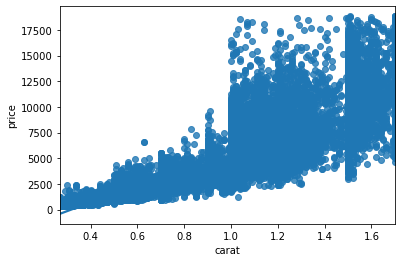

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


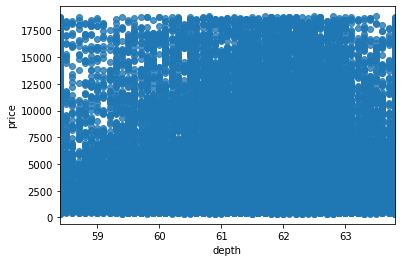

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


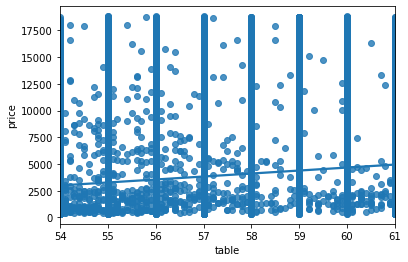

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


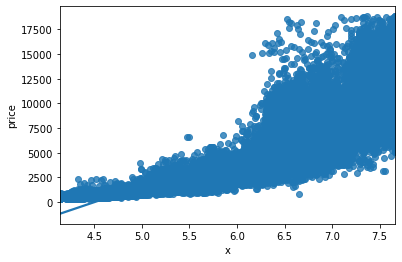

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


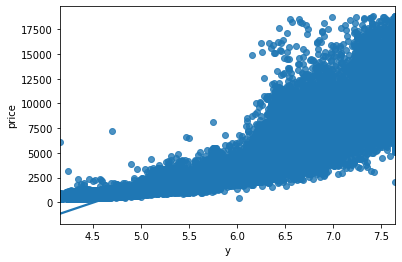

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


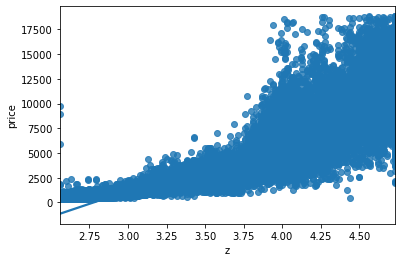

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


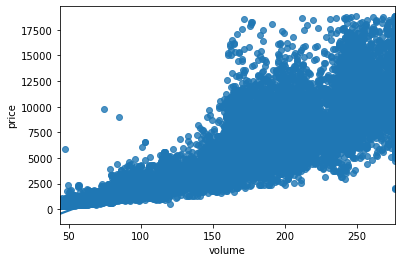

In [668]:
for i in df_num.columns:
    sns.regplot(df[i],df['price'])
    plt.show()

In [669]:
for i in df.select_dtypes(include=['object']):
    print(i,'value counts',df[i].value_counts(normalize=True))

cut value counts Ideal        0.399465
Premium      0.255564
Very Good    0.224366
Good         0.090914
Fair         0.029691
Name: cut, dtype: float64
color value counts G    0.209344
E    0.181754
F    0.176957
H    0.153755
D    0.125569
I    0.100526
J    0.052094
Name: color, dtype: float64
clarity value counts SI1     0.242289
VS2     0.227323
SI2     0.170060
VS1     0.151617
VVS2    0.094000
VVS1    0.067786
IF      0.033168
I1      0.013758
Name: clarity, dtype: float64


# Data Proprocessing

# Train Data Preprocessing

In [670]:
# 'x', 'y', 'z', 'volume' are highly correlated with 'carat'
# df = df.drop(labels=['x', 'y', 'z', 'volume'], axis=1)
df = df.drop(labels=['volume'], axis=1)

In [671]:
X=df.drop('price',axis=1)
# X=df.loc[:, df.columns != 'price']
y=df['price']

In [672]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [673]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((40340, 9), (13447, 9), (40340,), (13447,))

In [674]:
for i in X_train.select_dtypes(include=['object']):
    print(i,'value counts',X_train[i].value_counts(normalize=True))

cut value counts Ideal        0.399554
Premium      0.255825
Very Good    0.223674
Good         0.091200
Fair         0.029747
Name: cut, dtype: float64
color value counts G    0.209717
E    0.182647
F    0.176946
H    0.155057
D    0.125434
I    0.098959
J    0.051239
Name: color, dtype: float64
clarity value counts SI1     0.244373
VS2     0.228458
SI2     0.169658
VS1     0.150050
VVS2    0.093059
VVS1    0.067129
IF      0.033218
I1      0.014056
Name: clarity, dtype: float64


In [675]:
for i in X_test.select_dtypes(include=['object']):
    print(i,'value counts',X_test[i].value_counts(normalize=True))

cut value counts Ideal        0.399197
Premium      0.254778
Very Good    0.226445
Good         0.090057
Fair         0.029523
Name: cut, dtype: float64
color value counts G    0.208225
E    0.179073
F    0.176991
H    0.149848
D    0.125976
I    0.105228
J    0.054659
Name: color, dtype: float64
clarity value counts SI1     0.236038
VS2     0.223916
SI2     0.171265
VS1     0.156317
VVS2    0.096825
VVS1    0.069755
IF      0.033019
I1      0.012865
Name: clarity, dtype: float64


Splitted data is representative of unsplitted data as proportions of each value are approximate same in both train data and test data.

In [676]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [677]:
num_train=X_train.drop(['cut','color','clarity'],axis=1)
num_train

,carat,depth,table,x,y,z
1104,0.85,62.0,57.0,6.10,6.02,3.76
18263,1.51,60.6,60.2,7.32,7.37,4.45
13658,1.01,61.9,56.0,6.53,6.45,4.02
2169,0.80,63.1,57.0,5.94,5.89,3.73
44186,0.33,59.5,60.0,4.50,4.54,2.69
...,...,...,...,...,...,...
28017,0.31,62.7,58.0,4.33,4.31,2.71
50496,0.31,63.2,57.0,4.29,4.32,2.72
29199,0.31,62.2,57.0,4.37,4.34,2.71
40061,0.41,61.1,55.0,4.79,4.83,2.94


In [678]:
scaler=StandardScaler()
# Column names are lost after scaling 
# DatFrame isconverted to a numpy ndarray
num_train_rescaled=pd.DataFrame(scaler.fit_transform(num_train),columns=num_train.columns,index=num_train.index)
num_train_rescaled.head()

,carat,depth,table,x,y,z
1104,0.165999,0.231603,-0.191155,0.368635,0.293656,0.357229
18263,1.718349,-0.902712,1.432766,1.516176,1.572476,1.407878
13658,0.542327,0.150580,-0.698630,0.773096,0.700984,0.753126
2169,0.048397,1.122850,-0.191155,0.218137,0.170511,0.311549
44186,-1.057064,-1.793959,1.331271,-1.136337,-1.108310,-1.272038


In [679]:
cat_train=X_train[['cut','color','clarity']]
cat_train

,cut,color,clarity
1104,Ideal,G,SI2
18263,Very Good,I,SI2
13658,Premium,F,SI1
2169,Very Good,D,VS2
44186,Premium,I,VS1
...,...,...,...
28017,Premium,F,SI1
50496,Good,H,VS1
29199,Premium,I,VVS2
40061,Ideal,G,VS1


In [680]:
cut={'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
color={'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}
clarity={'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

In [681]:
cat_train['cut'].replace(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], [5, 4, 3, 2, 1], inplace= True)
cat_train['color']=cat_train['color'].apply(lambda x:color[x])
cat_train['clarity']=cat_train['clarity'].apply(lambda x:clarity[x])

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-681-ba8cccd99b0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_train['color']=cat_train['color'].apply(lambda x:color[x])
<ipython-input-681-ba8cccd99b0d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [682]:
cat_train

,cut,color,clarity
1104,5,4,2
18263,3,2,2
13658,4,5,3
2169,3,7,4
44186,4,2,5
...,...,...,...
28017,4,5,3
50496,2,3,5
29199,4,2,6
40061,5,4,5


In [683]:
pro_X_train_df=pd.concat([num_train_rescaled,cat_train],axis=1)
pro_X_train_df

,carat,depth,table,x,y,z,cut,color,clarity
1104,0.165999,0.231603,-0.191155,0.368635,0.293656,0.357229,5,4,2
18263,1.718349,-0.902712,1.432766,1.516176,1.572476,1.407878,3,2,2
13658,0.542327,0.150580,-0.698630,0.773096,0.700984,0.753126,4,5,3
2169,0.048397,1.122850,-0.191155,0.218137,0.170511,0.311549,3,7,4
44186,-1.057064,-1.793959,1.331271,-1.136337,-1.108310,-1.272038,4,2,5
...,...,...,...,...,...,...,...,...,...
28017,-1.104105,0.798760,0.316320,-1.296241,-1.326183,-1.241584,4,5,3
50496,-1.104105,1.203873,-0.191155,-1.333865,-1.316710,-1.226357,2,3,5
29199,-1.104105,0.393648,-0.191155,-1.258616,-1.297765,-1.241584,4,2,6
40061,-0.868901,-0.497599,-1.206106,-0.863561,-0.833600,-0.891368,5,4,5


# Test Data Preprocessing

In [684]:
num_test=X_test.drop(['cut','color','clarity'],axis=1)
num_test

,carat,depth,table,x,y,z
29886,0.29,61.1,57.0,4.26,4.29,2.61
1062,0.31,60.8,60.0,4.42,4.37,2.67
12693,1.02,61.2,56.0,6.53,6.48,3.98
21480,1.06,62.0,57.0,6.49,6.54,4.04
484,0.73,62.2,59.0,5.77,5.68,3.56
...,...,...,...,...,...,...
30515,0.30,60.2,56.0,4.37,4.40,2.64
42370,0.50,61.8,57.0,5.09,5.11,3.15
9850,1.00,60.1,61.0,6.40,6.44,3.86
46337,0.55,62.1,55.4,5.25,5.27,3.26


In [685]:
scaler=StandardScaler()
# Column names are lost after scaling 
# DatFrame isconverted to a numpy ndarray
num_test_rescaled=pd.DataFrame(scaler.fit_transform(num_test),columns=num_test.columns,index=num_test.index)
num_test_rescaled.head()

,carat,depth,table,x,y,z
29886,-1.152660,-0.488957,-0.198064,-1.364303,-1.347851,-1.395478
1062,-1.105906,-0.731339,1.319293,-1.214440,-1.272378,-1.304465
12693,0.553859,-0.408163,-0.703850,0.761871,0.718214,0.682655
21480,0.647366,0.238188,-0.198064,0.724405,0.774819,0.773668
484,-0.124073,0.399776,0.813507,0.050024,-0.036513,0.045563


In [686]:
cat_test=X_test[['cut','color','clarity']]
cat_test

,cut,color,clarity
29886,Ideal,F,VVS1
1062,Premium,I,VS2
12693,Ideal,H,VS2
21480,Ideal,D,VS1
484,Premium,E,SI1
...,...,...,...
30515,Ideal,D,SI2
42370,Ideal,I,VVS2
9850,Good,F,SI1
46337,Very Good,F,VS2


In [687]:
cut={'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
color={'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}
clarity={'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

In [688]:
cat_test['cut'].replace(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], [5, 4, 3, 2, 1], inplace= True)
cat_test['color']=cat_test['color'].apply(lambda x:color[x])
cat_test['clarity']=cat_test['clarity'].apply(lambda x:clarity[x])

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-688-3d927f120778>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_test['color']=cat_test['color'].apply(lambda x:color[x])
<ipython-input-688-3d927f120778>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [689]:
cat_test

,cut,color,clarity
29886,5,5,7
1062,4,2,4
12693,5,3,4
21480,5,7,5
484,4,6,3
...,...,...,...
30515,5,7,2
42370,5,2,6
9850,2,5,3
46337,3,5,4


In [690]:
pro_X_test_df=pd.concat([num_test_rescaled,cat_test],axis=1)
pro_X_test_df

,carat,depth,table,x,y,z,cut,color,clarity
29886,-1.152660,-0.488957,-0.198064,-1.364303,-1.347851,-1.395478,5,5,7
1062,-1.105906,-0.731339,1.319293,-1.214440,-1.272378,-1.304465,4,2,4
12693,0.553859,-0.408163,-0.703850,0.761871,0.718214,0.682655,5,3,4
21480,0.647366,0.238188,-0.198064,0.724405,0.774819,0.773668,5,7,5
484,-0.124073,0.399776,0.813507,0.050024,-0.036513,0.045563,4,6,3
...,...,...,...,...,...,...,...,...,...
30515,-1.129283,-1.216103,-0.703850,-1.261272,-1.244076,-1.349972,5,7,2
42370,-0.661743,0.076600,-0.198064,-0.586891,-0.574256,-0.576360,5,2,6
9850,0.507105,-1.296897,1.825079,0.640108,0.680478,0.500629,2,5,3
46337,-0.544859,0.318982,-1.007321,-0.437029,-0.423310,-0.409503,3,5,4


# APPLYING KNN ALGORITHM:

In [691]:
# Train data metrics

In [692]:
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(pro_X_train_df, y_train)

KNeighborsRegressor()

In [693]:
#to check for bias finding train accuracy
y_train_pred=regressor.predict(pro_X_train_df)

In [694]:
temp_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
temp_df.head()

,Actual,Predicted
1104,2913,2776.6
18263,7441,7296.4
13658,5599,4926.0
2169,3135,3632.0
44186,521,590.8


In [695]:
print('Mean Absolute Error: ', mean_absolute_error(y_train, y_train_pred))
print('Mean Squared Error: ', mean_squared_error(y_train, y_train_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('Train Accuracy of algorithm model: ',r2_score(y_train, y_train_pred))

Mean Absolute Error:  367.05046108081314
Mean Squared Error:  592045.502145761
Root Mean Squared Error:  769.4449311976531
Train Accuracy of algorithm model:  0.962476880701933


In [696]:
print("Adjusted R^2:",1 - (1-r2_score(y_train, y_train_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

Adjusted R^2: 0.9624685070824517


In [697]:
actual   = np.array(y_train)
forecast = np.array(y_train_pred)
# Consider a list APE to store the APE value for each of the records in dataset
APE = []
# Iterate over the list values
for i in range(len(actual)):
    # Calculate percentage error
    per_err = (actual[i] - forecast[i]) / actual[i]
    # Take absolute value of the percentage error (APE)
    per_err = abs(per_err)
    # Append it to the APE list
    APE.append(per_err)
MAPE = sum(APE)/len(APE)
MAPE

0.09238407247993971

In [698]:
k=[]
r2=[]
for i in range(1,10,2):
    regressor = KNeighborsRegressor(n_neighbors=i)
    regressor.fit(pro_X_train_df, y_train)
    y_train_pred=regressor.predict(pro_X_train_df)
    r2.append(r2_score(y_train, y_train_pred))    
    k.append(i) 

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

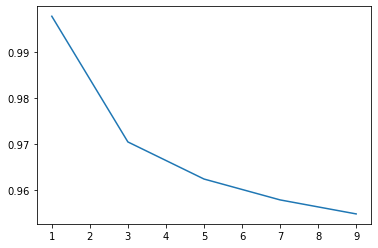

In [699]:
sns.lineplot(k,r2)

In [700]:
# Test data metrics

In [701]:
y_test_pred = regressor.predict(pro_X_test_df)

In [702]:
len(y_test_pred)

13447

In [703]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df.head()

,Actual,Predicted
29886,715,895.888889
1062,558,575.000000
12693,5312,5853.000000
21480,9625,9818.111111
484,2821,2605.777778


In [704]:
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('test Accuracy of algorithm model: ',r2_score(y_test, y_test_pred))

Mean Absolute Error:  467.3848359402758
Mean Squared Error:  960967.2237958441
Root Mean Squared Error:  980.2893571776876
test Accuracy of algorithm model:  0.9408949921052038


In [705]:
print("Adjusted R^2:",1 - (1-r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Adjusted R^2: 0.94085540402222


In [706]:
actual   = np.array(y_test)
forecast = np.array(y_test_pred)
# Consider a list APE to store the APE value for each of the records in dataset
APE = []
# Iterate over the list values
for i in range(len(actual)):
    # Calculate percentage error
    per_err = (actual[i] - forecast[i]) / actual[i]
    # Take absolute value of the percentage error (APE)
    per_err = abs(per_err)
    # Append it to the APE list
    APE.append(per_err)
MAPE = sum(APE)/len(APE)
MAPE

0.11386326603322527

In [707]:
k=[]
r2=[]
for i in range(1,10,2):
    regressor = KNeighborsRegressor(n_neighbors=i)
    regressor.fit(pro_X_test_df, y_test)
    y_test_pred=regressor.predict(pro_X_test_df)
    r2.append(r2_score(y_test, y_test_pred))    
    k.append(i) 

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

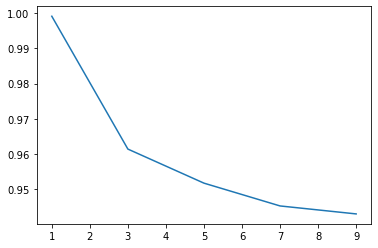

In [708]:
sns.lineplot(k,r2)